In [ ]:
Using a sample dataset to demonstrate the use of Simple Linear Regression

In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a dataframe

In [4]:
df=pd.read_csv('height_weight_dataset.csv')

In [5]:
df.head()

,ID,Height_cm,Weight_kg
0,1,187.6,98.2
1,2,174.0,49.8
2,3,179.8,50.9
3,4,192.4,84.5
4,5,188.7,52.4


<AxesSubplot: xlabel='Height_cm', ylabel='Weight_kg'>

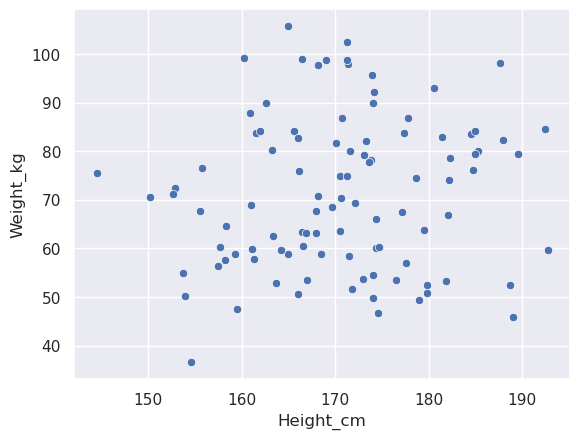

In [6]:
sns.set_theme()
sns.scatterplot(data=df,x='Height_cm',y='Weight_kg')

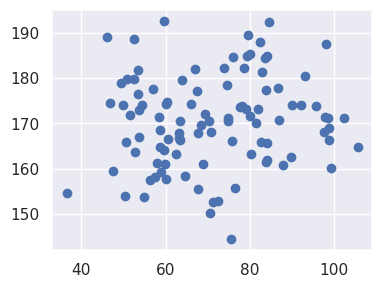

In [7]:
fig=plt.figure()
fig.add_axes([0,0,.5,.5])
plt.scatter(df['Weight_kg'],y=df['Height_cm'])

In [8]:
from sklearn.model_selection import train_test_split

Dividing the features into X and Y

In [9]:
x=df[['Height_cm']] ##independent Feature
y=df[['Weight_kg']] ## Dependent Feature

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,train_size=.8,random_state=42)

In [11]:
x.shape

(100, 1)

In [12]:
X_train.shape

(80, 1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_std=scaler.transform(X_train)

In [17]:
X_test_std=scaler.transform(X_test)

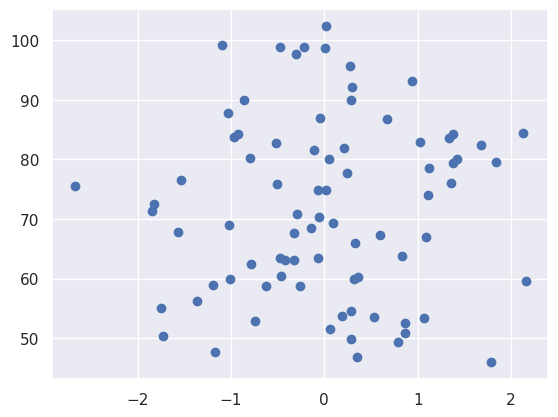

In [18]:
plt.scatter(X_train_std,Y_train)

In [19]:
##Train the model
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()

In [21]:
regressor.fit(X_train_std,Y_train)

LinearRegression()

In [22]:
regressor.coef_ ##Slope

array([[0.6048571]])

In [23]:
regressor.intercept_ ##Slope

array([71.77])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


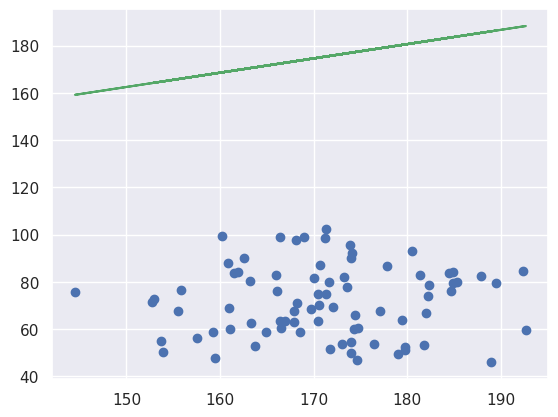

In [24]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),color='g')

In [25]:
Y_pred=regressor.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [26]:
Y_pred

array([[165.28090801],
       [167.45839358],
       [179.01116423],
       [171.93433613],
       [171.51093616],
       [172.78113608],
       [179.79747846],
       [167.51887929],
       [175.44250733],
       [185.24119238],
       [176.4707644 ],
       [175.50299304],
       [167.15596503],
       [162.61953676],
       [172.17627898],
       [185.9065352 ],
       [169.33345059],
       [171.08753619],
       [179.19262136],
       [176.89416437]])

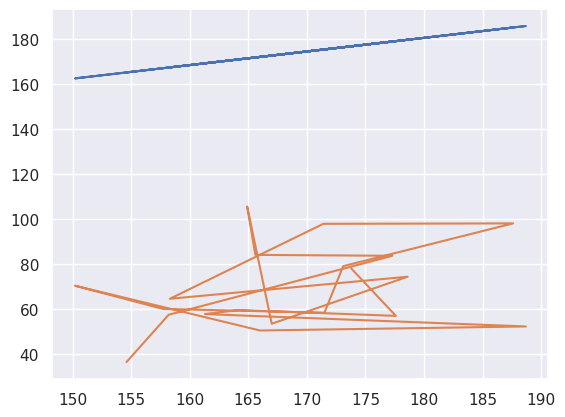

In [27]:
##Plotting both the lines
plt.plot(X_test,Y_pred)
plt.plot(X_test,Y_test)

In [28]:
##chekcing matrics fo the model
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [29]:
mse=mean_squared_error(Y_test,Y_pred)

In [30]:
mae=mean_absolute_error(Y_test,Y_pred)

In [31]:
mse,mae

(11216.565253656965, 104.56083887863925)

In [32]:
rmse=nm.sqrt(mse)

In [33]:
rmse

105.90828699236413

In [34]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(Y_test,Y_pred)

In [36]:
score

-34.617248674941315

In [37]:
##Testing for a new data
height=[121]
##scaling the data
height_scaled=scaler.transform([height])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
##Predicting the data
print(regressor.predict(height_scaled))

[[68.731412]]


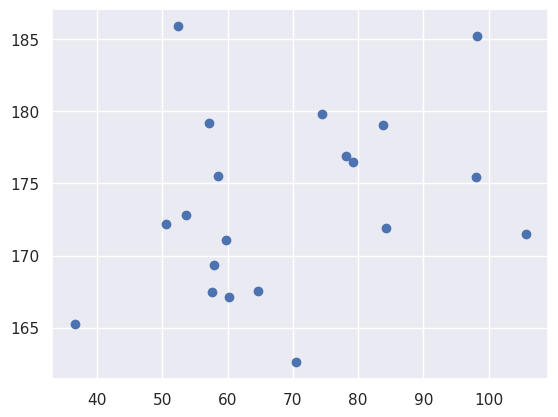

In [39]:
##Scatterplot for the prediction
plt.scatter(Y_test,Y_pred) ## Should be Linear

In [40]:
residuals=Y_test-Y_pred

In [94]:
residuals

,Weight_kg
83,-128.680908
53,-109.858394
70,-95.211164
45,-87.734336
44,-65.810936
39,-119.181136
22,-105.297478
80,-102.818879
10,-77.442507
0,-87.041192


/tmp/ipykernel_77/1297270463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True) ## Should be normally Distributed


<AxesSubplot: ylabel='Density'>

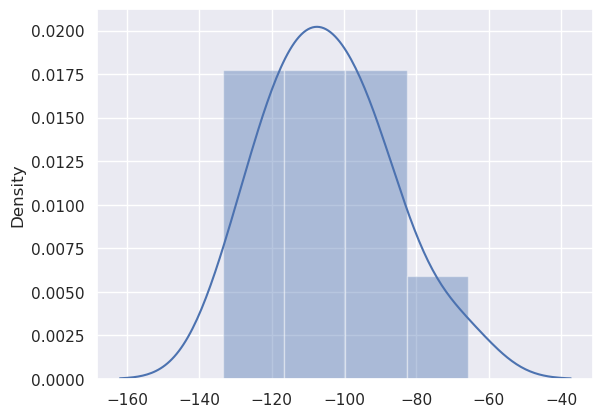

In [41]:
sns.distplot(residuals,kde=True) ## Should be normally Distributed

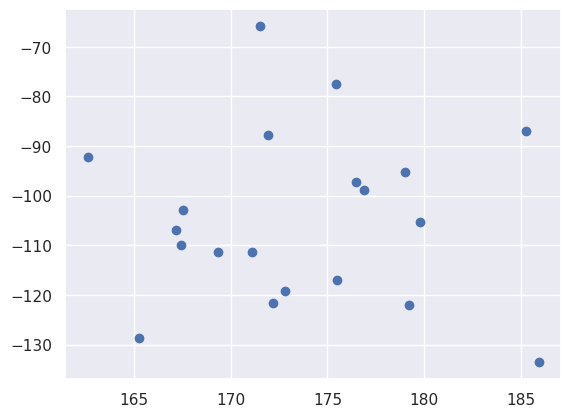

In [42]:
plt.scatter(Y_pred,residuals) ## Should be uniformly distrubuted

/tmp/ipykernel_77/2189206875.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True,ax=axes[0,0],color='g')
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'X Train vs Y Pred')

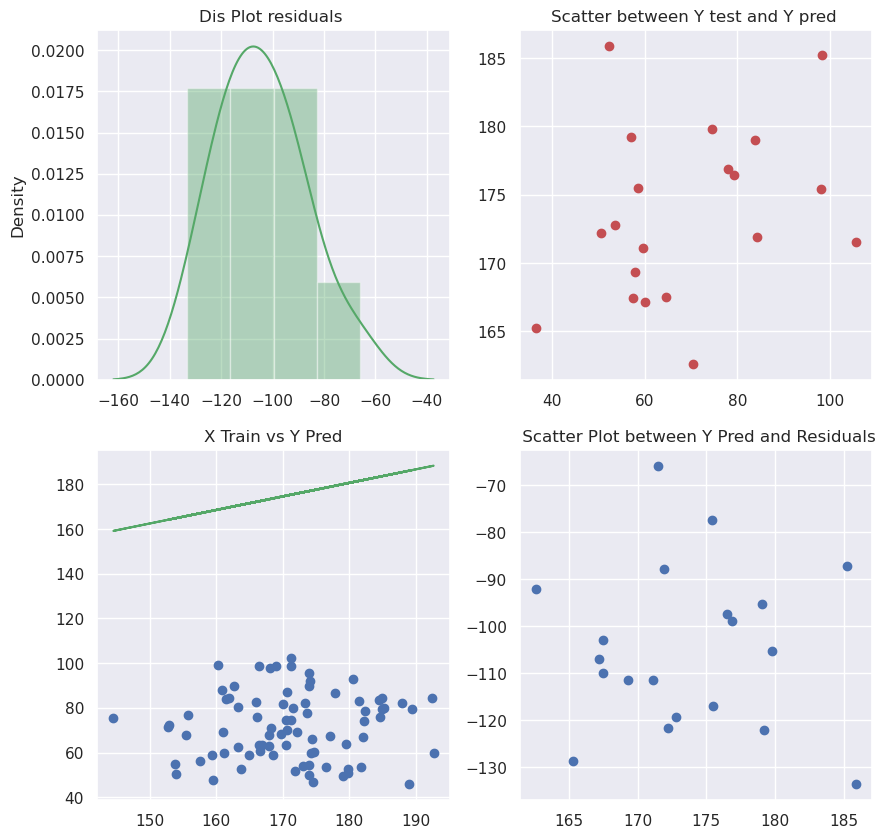

In [62]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
plt.scatter(x=Y_pred,y=residuals)
axes[1,1].set_title(' Scatter Plot between Y Pred and Residuals')
sns.distplot(residuals,kde=True,ax=axes[0,0],color='g')
axes[0,0].set_title('Dis Plot residuals ')
axes[0,1].scatter(x=Y_test,y=Y_pred,color='r')
axes[0,1].set_title('Scatter between Y test and Y pred ')
axes[1,0].scatter(X_train,Y_train)
axes[1,0].plot(X_train,regressor.predict(X_train),color='g')
axes[1,0].set_title('X Train vs Y Pred')